<a href="https://colab.research.google.com/github/fawziafaraag/random_search_optimization/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [2.84635104]
0 [1.6001366]
0 [1.6001366]
0 [1.6001366]
0 [1.6001366]
0 [1.6001366]
0 [1.6001366]
0 [1.6001366]
0 [1.6001366]
0 [1.6001366]
0 [1.6001366]
0 [1.14561041]
0 [1.14561041]
0 [1.14561041]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
0 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.01288985]
1 [1.

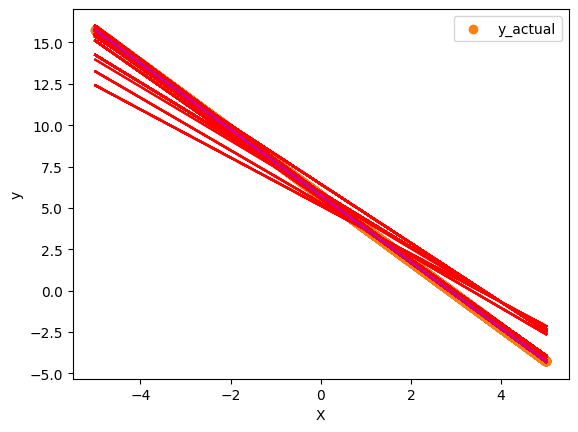

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

X=np.linspace(-5,5,2000).reshape(-1,1)
y=lambda x: -2*x+5+np.random.rand()*0.75

Y = y(X).reshape(-1,1)
Y

plt.scatter(X,Y)

#classes
class particle:
  def __init__(self,bounds,varsize,J):
    self.position=np.random.uniform(bounds[:,0],bounds[:,1]).reshape(varsize)
    self.cost=J(self.position)
    self.velocity=np.zeros(varsize)
    self.best_cost=self.cost
    self.best_position=self.position.copy()
    
  
  def __repr__(self):
    return f'{self.position}'

class Global:
  def __init__(self):
    self.cost=float('inf')
    self.position=[]

#problem definition
m=len(X)
J = lambda x: sum(((x[0]*X + x[1])-Y) ** 2)/m
h_l=[]
h_x = lambda x: x[0]*X + x[1]
nvar=2
varsize=np.array([nvar,1])
Varmax=[-5,-10]
Varmin=[10,8]
bounds=np.column_stack((Varmin,Varmax))

#paramters of PSO
w=1
c1=2
c2=2
npop=50
MaxIt=100
damp=0.8

#intialization
particles=[None]*npop
Globalbest=Global()
for i in range(npop):
  particles[i]=particle(bounds,varsize,J)
  if (particles[i].cost<Globalbest.cost).any():
     Globalbest.cost=particles[i].cost
     Globalbest.position=particles[i].position

#main loop
for i in range(MaxIt):
  for j in range(npop):
    particles[j].velocity=damp*w*(particles[j].velocity)+np.random.rand()*c1*(particles[j].best_position -particles[j].position ) \
                                    + np.random.rand()* c2 * (Globalbest.position - particles[j].position )
    particles[j].position = particles[j].position + particles[j].velocity
    #particles[j].position=np.maximum(bounds[:,0].reshape(-1,1),particles[j].position)
    particles[j].cost=J(particles[j].position)
    if (particles[j].cost<particles[j].best_cost).any():
      particles[j].best_cost=particles[j].cost
      particles[j].best_position=particles[j].position.copy()
      if (particles[j].cost<Globalbest.cost).any():
        
         Globalbest.cost=particles[j].cost
         Globalbest.position=particles[j].position.copy()
    h = h_x(Globalbest.position)
    h_l.append(h)
    
    print(i, Globalbest.cost)

plt.scatter(X,Y,label="y_actual")
for h in h_l:
    plt.plot(X,h ,color='red')

plt.plot(X,h ,color='m')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()